# Google Apps 商店的数据分析

## 简介

相信大家对移动应用商店都不陌生吧。Google Play Store（Google Play商店）是谷歌官方的软件应用商店，拥有上架软件数十万款，下载量更是突破了20亿次，为了手机用户提供了极为广泛的应用选择，很受大家的欢迎。



本数据集(googleplaystore.csv)包含了 Google Play 商店中 App 的数据。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分，其中包含 Google Play 商店中 10k+ 应用软件的信息。

数据中的变量含义解释：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。

```

## 项目完成指南



本项目中的数据分析流程已经给出，但代码将完全由你自己进行书写，如果你无法完成本项目，说明你目前的能力并不足以完成 数据分析(进阶)纳米学位，建议先进行 数据分析（入门）纳米学位的学习，掌握进阶课程的先修知识。

对于数据分析过程的记录也是数据分析报告的一个重要部分，你可以自己在需要的位置插入Markdown cell，记录你在数据分析中的关键步骤和推理过程。比如：数据有什么样的特点，统计数据的含义是什么，你从可视化中可以得出什么结论，下一步分析是什么，为什么执行这种分析。如果你无法做到这一点，你也无法通过本项目。


> **小贴士**: 像这样的引用部分旨在为学员提供实用指导，帮助学员了解并使用 Jupyter notebook

## 提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。在你分析数据之前，请先思考几个你需要了解的关于 Google 商店中应用的问题，例如，最受欢迎（下载量最高）的 Apps 有什么特征？哪些 App 的评分更高？

**问题**：1.什么类型的APP评分比较高？ 什么类型的APP数量最多？下载量和评分之间是否有一定关系?

**答案**


在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。

> **小贴士**: 双击上框，文本就会发生变化，所有格式都会被清除，以便你编辑该文本块。该文本块是用 [Markdown](http://daringfireball.net/projects/markdown/syntax)编写的，该语言使用纯文本语法，能用页眉、链接、斜体等来规范文本格式。在纳米学位课程中，你也会用到 Markdown。编辑后，可使用 **Shift** + **Enter** 或 **Shift** + **Return** 运行上该框，使其呈现出编辑好的文本格式。

## 数据评估和清理

> **小贴士**: 运行代码框的方法与编辑上方的 Markdown 框的格式类似，你只需点击代码框，按下键盘快捷键 **Shift** + **Enter** 或 **Shift** + **Return** ，或者你也可先选择代码框，然后点击工具栏的 **运行** 按钮来运行代码。运行代码框时，相应单元左侧的信息会出现星号，即 `In [*]:`，若代码执行完毕，星号则会变为某个数字，如 `In [1]`。如果代码运行后有输出结果，输出将会以 `Out [1]:` 的形式出现，其中的数字将与 "In" 中的数字相对应。

In [27]:
# 请先运行此代码块，以确保在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf -O /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

--2019-07-13 14:54:22--  http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf
Resolving d.xiazaiziti.com (d.xiazaiziti.com)... 67.198.189.58
Connecting to d.xiazaiziti.com (d.xiazaiziti.com)|67.198.189.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/octet-stream]
Saving to: ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/opt/conda/lib/pyth 100%[===================>]   9.58M  3.13MB/s    in 3.1s    

2019-07-13 14:54:25 (3.13 MB/s) - ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



In [28]:
# TO DO: load pacakges
import pandas as pd
%matplotlib inline

In [29]:
# TO DO: load the dataset
df = pd.read_csv('googleplaystore.csv',sep=',')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
df.shape

(10841, 13)

In [31]:
# TO DO: check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [32]:
sum(df.duplicated())

483

### TO DO: clean the data (optional: only there are problems)
由上面信息可以知道:
1) rating, type, content rating, current Var, Android Var这几列有数据缺失
2) 有483行为重复
所以需要补全数据，以及删除重复行

#### 1.删除重复数据

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.shape

(10358, 13)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
App               10358 non-null object
Category          10358 non-null object
Rating            8893 non-null float64
Reviews           10358 non-null object
Size              10358 non-null object
Installs          10358 non-null object
Type              10357 non-null object
Price             10358 non-null object
Content Rating    10357 non-null object
Genres            10358 non-null object
Last Updated      10358 non-null object
Current Ver       10350 non-null object
Android Ver       10355 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [36]:
df = df.reset_index(drop=True)

##### 2.缺失数据补充

###### 2.1 Rating一列补全：Rating为数值，所以可以通过mean的方法补全

In [37]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True) #rating为数字，可以通过mean来补全

2.2 Type\content rating\current Ver\Android Ver这几列补全：这几列看着为字符型，并且只缺失数量都不多，所以先看看是哪几行缺失数据

###### 2.2.1 Type

In [38]:
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8667,Command & Conquer: Rivals,FAMILY,4.189542,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


查看该APP是否有其他记录：

In [39]:
df[df['App']=='Command & Conquer: Rivals']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8667,Command & Conquer: Rivals,FAMILY,4.189542,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


有上面可知，该APP在数据中只有一条数据。因此没法通过其他数据来获取type信息。只能通过Google APPStore查找。查找后，发现该APP的type是Free，因此将其补充进数据：

In [40]:
df.loc[df['App']=='Command & Conquer: Rivals', ['Type']]='Free'

In [41]:
df[df['App']=='Command & Conquer: Rivals']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8667,Command & Conquer: Rivals,FAMILY,4.189542,0,Varies with device,0,Free,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


###### 2.2.2 Content Rating

In [42]:
df[df['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [43]:
df.loc[[9990],['Content Rating']]='Everyone'

###### 2.2.3  Current Ver\Android Ver 未找到对应版本数据，删除这些数据。

In [44]:
df = df.dropna()

In [45]:
df.shape

(10347, 13)

## 数据探索分析

### 1. 什么类型的APP数量最多？什么类型的APP评分比较高?

In [46]:
df['Category'].value_counts()

FAMILY                 1940
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
EVENTS                   64
ART_AND_DESIGN           64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

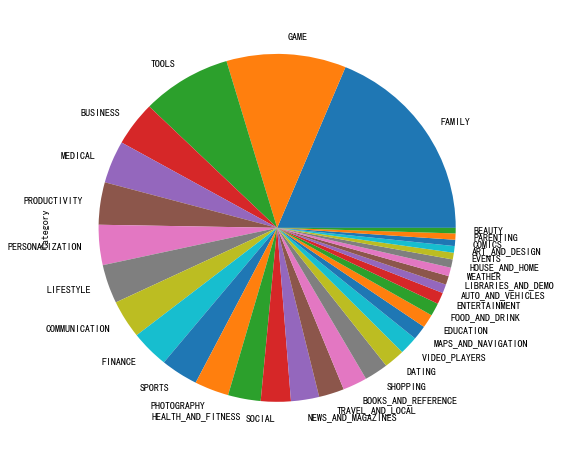

In [47]:
df['Category'].value_counts().plot(kind='pie',figsize=(8,8))

从上图可知，家庭这个类别的APP数量最多，其次是游戏和工具。

In [48]:
# In exploratory data analysis, please make sure of using statistics and visualizations
df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
EDUCATION              4.374535
ART_AND_DESIGN         4.368260
EVENTS                 4.362520
BOOKS_AND_REFERENCE    4.311599
PERSONALIZATION        4.304104
PARENTING              4.281590
GAME                   4.277438
BEAUTY                 4.260094
HEALTH_AND_FITNESS     4.251111
SOCIAL                 4.246513
SHOPPING               4.245401
WEATHER                4.239351
SPORTS                 4.218576
PRODUCTIVITY           4.199599
FAMILY                 4.191066
AUTO_AND_VEHICLES      4.190288
MEDICAL                4.184293
PHOTOGRAPHY            4.183266
LIBRARIES_AND_DEMO     4.182034
HOUSE_AND_HOME         4.168431
FOOD_AND_DRINK         4.167837
COMMUNICATION          4.157604
COMICS                 4.156318
NEWS_AND_MAGAZINES     4.140065
ENTERTAINMENT          4.136036
FINANCE                4.134862
BUSINESS               4.134562
LIFESTYLE              4.113107
TRAVEL_AND_LOCAL       4.107027
VIDEO_PLAYERS          4.074532
TOOLS                  4.065482

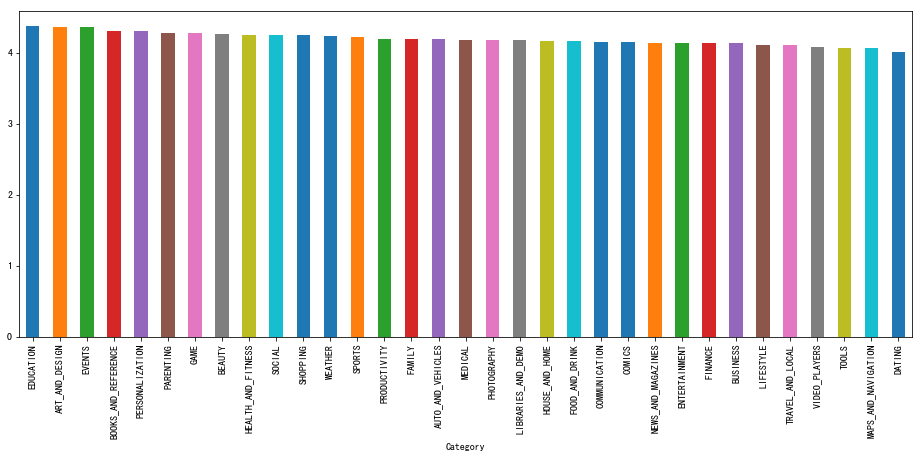

In [49]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(16,6));

有上图可知，教育类的软件平均平分最高，约会类的软件平均评分最低，但是各类别APP的平均评分差异不大。

### 下载量和评分之间是否有一定关系?

将install类型转为数字

In [50]:
df['Installs'].value_counts()

1,000,000+        1487
10,000,000+       1132
100,000+          1129
10,000+           1031
1,000+             888
100+               709
5,000,000+         683
500,000+           516
50,000+            473
5,000+             468
10+                384
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64

In [51]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [52]:
df['Installs'].dtypes

dtype('int64')

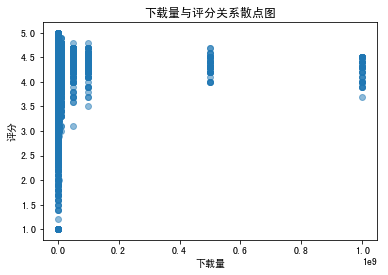

In [54]:
import matplotlib.pyplot as plt
plt.title(u'下载量与评分关系散点图')
plt.xlabel(u'下载量')
plt.ylabel(u'评分')
plt.legend()
plt.scatter(df['Installs'],df['Rating'],alpha=0.5)
plt.show()

由上图可知，虽然下载量与评分之间没有显著的相关关系，但两者之间似乎呈现出了分化的情况：即当APP评分小于3.5时，下载量很小，几乎没有；评分在3.5-4之间时，下载量有所增加；当评分大于4时，下载量与评分间关系不大。

## 得出结论

**问题**：上面的分析能够回答你提出的问题？通过这些分析你能够得出哪些结论？

**答案**：通过描述性统计分析可以知道，家庭、游戏、工具三类APP数量最大；教育类、艺术、事件这三类软件评分较高，但是他们与其他类别的软件评分相差不是很大。最后评分与下载量之间呈现一种阶梯式增长的关系：当评分小于3.5时，软件下载量很少；3.5-4.0时，下载量有所增加，当软件超过4.0分时，下载量与评分没有显著的相关关系。

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：1.数据集完整，包含想要分析的数据。
2.数据处理时，Rating缺失较多，用mean值填充，对结论影响应该不大。其他列缺失值数量较少，直接删除对结论影响也不大。
3.如果有各年龄段的下载量数据，会对最后相关分析产生影响，可以知道哪些年龄段的人喜欢哪些类别的软件。以及各个年龄段对APP声誉、传播的影响。
4.相关并不等于因果，在相关分析时，并没有涉及到因果关系的说明。

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。